## Statsmodels version 0.13.5 is required for dcurves
pip install statsmodels==0.13.5



In [ ]:
pip install statsmodels==0.13.5

In [ ]:
pip install dcurves

In [ ]:
pip install lifelines

In [ ]:
pip install scipy==1.8.0

In [1]:
import pandas as pd
import joblib
import lifelines
import statsmodels
import dcurves
import numpy as np
from dcurves import dca, plot_graphs
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Miller_2023_train_DR_imputed.csv')
df_validate = pd.read_csv('Miller_2023_validate_DR_imputed.csv')

In [3]:
df_train['REC_GRAFT_STAT'].value_counts(normalize=True)

REC_GRAFT_STAT
0.0    0.695299
1.0    0.304701
Name: proportion, dtype: float64

In [4]:
# Assuming df1 and df2 are already defined with a 'REC_CTR_CD' column

# Get the unique recipient center codes in both dataframes
unique_df_train = set(df_train['REC_CTR_CD'])
unique_df_validate = set(df_validate['REC_CTR_CD'])

# Remove rows in df1 where REC_CTR_CD is not in df2
df_train_filtered = df_train[df_train['REC_CTR_CD'].isin(unique_df_validate)]

# Remove rows in df2 where REC_CTR_CD is not in df1
df_validate_filtered = df_validate[df_validate['REC_CTR_CD'].isin(unique_df_train)]

In [5]:
df_train = df_train_filtered

df_validate = df_validate_filtered

In [6]:
df_train.dropna(inplace=True)
df_validate.dropna(inplace=True)

In [7]:
df_train['Graft_Survival_Time'] = (df_train['Graft_Survival_Time'])/364
df_validate['Graft_Survival_Time'] = (df_validate['Graft_Survival_Time'])/364

In [8]:
from lifelines import CoxPHFitter

# Donor & Recipient Characteristics, including Race and HCV Status

In [9]:
# DONOR-RECIPIENT MODEL FITTED W/ RACE VARIABLE

cph = CoxPHFitter()

cph.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula = "DON_AGE + DON_RACE_SRTR + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI "
    
)

Iteration 1: norm_delta = 3.43e-01, step_size = 0.9500, log_lik = -115082.00714, newton_decrement = 1.23e+03, seconds_since_start = 1.8
Iteration 2: norm_delta = 2.20e-02, step_size = 0.9500, log_lik = -113893.09189, newton_decrement = 4.70e+00, seconds_since_start = 3.6
Iteration 3: norm_delta = 1.29e-03, step_size = 0.9500, log_lik = -113888.36697, newton_decrement = 1.87e-02, seconds_since_start = 5.3
Iteration 4: norm_delta = 1.72e-06, step_size = 1.0000, log_lik = -113888.34821, newton_decrement = 4.45e-08, seconds_since_start = 7.0
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 67044
number of events observed = 20468
   partial log-likelihood = -113888.35
         time fit was run = 2024-11-15 00:20:27 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_RACE_SRTR                   0.16      1.17      0.02            0.12            0.20                1.12                1.22
DON_CREAT                       0.06      1.06      0.01            0.03            0.08                1.04                1.08
DON_HIST_HTN                    0.11      1.11      0.02            0.07            0.14                1.07                1.15
DON_HIST_DB                     0.10      1.11      0.03            0.04            0.17                1.04                1.18
DON_COD_DON_STROKE              0.08      1.08      0.02            0.04            0.11                1.04                1.12
DON_ANTI_HCV                    0.27      1.31      0.05            0.17            0.37                1.19                1.45
DON_HGT_CM                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.26      0.77      0.06           -0.37           -0.14                0.69                0.87
REC_B_MM_EQUIV_TX              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
REC_DR_MM_EQUIV_TX              0.04      1.04      0.01            0.02            0.06                1.02                1.07
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.11      0.90      0.07           -0.25            0.04                0.78                1.04
REC_AGE_AT_TX                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
REC_DIAB                        0.13      1.14      0.02            0.10            0.16                1.10                1.18
REC_HTN                         0.03      1.03      0.02           -0.01            0.07                0.99                1.07
CAN_RACE_SRTR                   0.26      1.30      0.02            0.23            0.29                1.25                1.34
REC_DGN                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
CAN_PREV_TXFUS                  0.19      1.21      0.02            0.16            0.22                1.17                1.24
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.01      1.01      0.00            0.01            0.02                1.01                1.02
CAN_ANGINA                     -0.17      0.85      0.02           -0.21           -0.12                0.81                0.89
CAN_PERIPH_VASC                 0.29      1.33      0.03            0.22            0.36                1.25                1.43
REC_HCV_STAT                    0.22      1.24      0.03            0.16            0.

In [14]:
from dcurves import dca, plot_graphs

/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

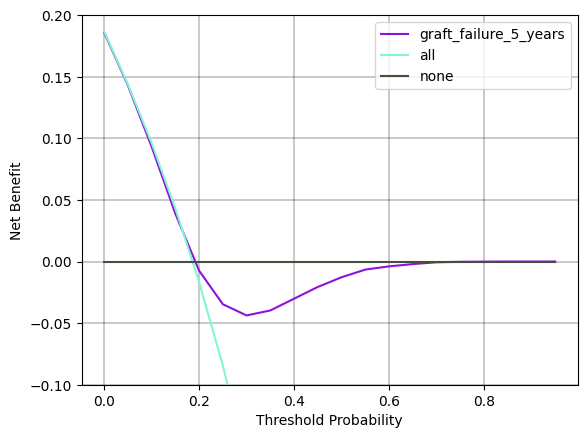

In [ ]:
# Predicted survival functions for each patient at up to 5 years post-transplant

cph_pred_vals = \
    cph.predict_survival_function(df_validate,
                                    times = [5])



df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]] #--> Graft Failure probability at 5 years



# Donor and Recipient Characteristics, With Race

stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 1.0, 0.05),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

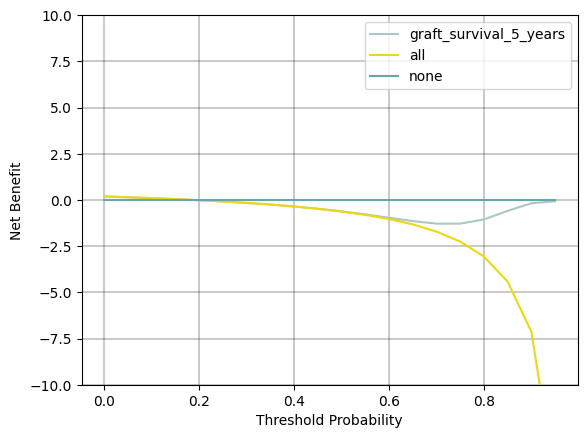

In [21]:
# Predicted survival functions for each patient at up to 5 years post-transplant

cph_pred_vals = cph.predict_survival_function(df_validate, times=[5])

# Store graft survival probability at 5 years instead of graft failure probability
df_validate['graft_survival_5_years'] = cph_pred_vals.iloc[0, :]  # Predicted graft survival probability at 5 years

# Decision Curve Analysis for Graft Survival
stdca_coxph_results_survival = dca(
    data=df_validate,
    outcome='REC_GRAFT_STAT',  # Outcome indicating graft status (e.g., 1 for failure, 0 for survival)
    modelnames=['graft_survival_5_years'],  # Use graft survival probabilities
    thresholds=np.arange(0, 1.0, 0.05),  # Threshold probabilities for graft survival
    time=5,  # Time horizon of 5 years for survival prediction
    time_to_outcome_col='Graft_Survival_Time'  # Column with time to graft survival/failure outcome
)

# Plotting Net Benefit for Graft Survival Decision Curve
plot_graphs(
    plot_df=stdca_coxph_results_survival,
    graph_type='net_benefit',
    y_limits=[-10, 10]  # Adjust y-axis limits as needed
)


/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

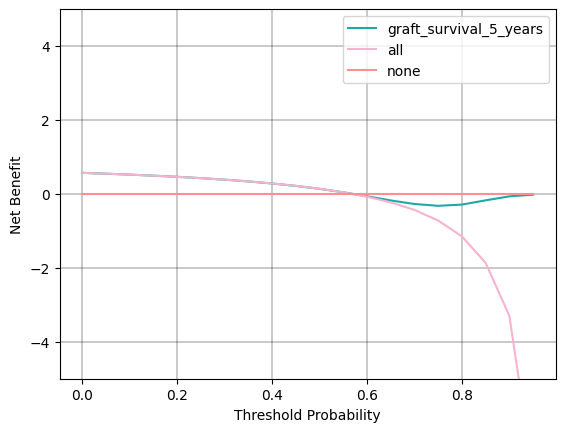

In [29]:
# Invert REC_GRAFT_STAT so that 1 indicates survival and 0 indicates failure
df_validate['REC_GRAFT_STAT'] = 1 - df_validate['REC_GRAFT_STAT']

# Decision Curve Analysis for Graft Survival
stdca_coxph_results_survival = dca(
    data=df_validate,
    outcome='REC_GRAFT_STAT',  # Outcome now represents survival (1 for survival, 0 for failure)
    modelnames=['graft_survival_5_years'],  # Use graft survival probabilities
    thresholds=np.arange(0, 1.0, 0.05),  # Threshold probabilities for graft survival decision-making
    time=5,  # Time horizon of 5 years for survival prediction
    time_to_outcome_col='Graft_Survival_Time'  # Column with time to graft survival/failure outcome
)

# Plotting Net Benefit for Graft Survival Decision Curve
plot_graphs(
    plot_df=stdca_coxph_results_survival,
    graph_type='net_benefit',
    y_limits=[-5, 5]  # Adjust y-axis limits as needed
)


In [ ]:
coefficients = cph.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data and initialize variables
N = len(df_validate)  # Total number of patients

# Full range of graft survival probability thresholds from 0% to 100% (0 to 1 in probability)
probability_thresholds = np.arange(0, 1.01, 0.01)

# Initialize lists to store net benefit values for each strategy across probability thresholds
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Loop through each graft survival probability threshold to calculate net benefit
for desired_probability in probability_thresholds:
    odds_ratio = desired_probability / (1 - desired_probability) if desired_probability < 1 else 0  # Avoid div by zero

    # Model Prediction strategy: Calculate TP and FP based on model predictions at each threshold
    above_threshold_mask = df_validate['5_yr_survival_prob'] >= desired_probability
    TP_model = ((above_threshold_mask & (df_validate['REC_GRAFT_STAT'] == 0)).sum())  # True Positives for model
    FP_model = ((above_threshold_mask & (df_validate['REC_GRAFT_STAT'] == 1)).sum())  # False Positives for model
    net_benefit_model_value = (TP_model / N) - (FP_model / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Accept All strategy: All grafts are assumed to survive; use desired_probability for odds_ratio only
    TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # True positives: all actual survivors
    FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # False negatives: all failures
    net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio
    net_benefit_accept_all.append(net_benefit_accept_all_value)

    # Accept None strategy: Always zero net benefit, since no transplants are accepted
    net_benefit_accept_none.append(0)

# Convert probability thresholds to percentages for the x-axis
probability_thresholds_percent = probability_thresholds * 100

# Calculate dynamic y-axis limits based on the range of net benefit values
all_net_benefits = net_benefit_model + net_benefit_accept_all + net_benefit_accept_none
y_min = min(all_net_benefits) - 0.05  # Add small buffer below minimum
y_max = max(all_net_benefits) + 0.05  # Add small buffer above maximum

# Plot the net benefit of each strategy across the full range of graft survival probabilities
plt.figure(figsize=(10, 6))
plt.plot(probability_thresholds_percent, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(probability_thresholds_percent, net_benefit_accept_all, 'r--', label='Accept All Transplants')
plt.plot(probability_thresholds_percent, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("Graft Survival Probability Threshold (%)")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategies Across Survival Probability Thresholds")
plt.ylim(y_min, y_max)  # Apply dynamic y-axis limits
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
curve_A = net_benefit_model

# Donor/Recipient without Race Term

In [ ]:
df_train = df_validate.drop('DON_RACE_SRTR', axis=1)
df_validate = df_validate.drop('DON_RACE_SRTR', axis=1)

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
# Donor Recipient model without race term

cph1 = CoxPHFitter()

cph1.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph1.print_summary()

In [ ]:
cph_pred_vals = \
    cph1.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

In [ ]:
stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [ ]:
coefficients = cph1.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Set threshold range for KDRI from df_validate
kdri_thresholds = np.arange(df_validate['KDRI'].min(), df_validate['KDRI'].max(), 0.001)  # Use KDRI range for thresholds
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Loop over each KDRI threshold (range of KDRI values)
for threshold in kdri_thresholds:
    # For the "Model" strategy, accept grafts where 5-year survival probability >= threshold
    is_below_threshold = df_validate['5_yr_survival_prob'] >= threshold  # Accept if survival probability >= KDRI threshold
    
    # Calculate True Positives and False Positives for the model strategy
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # Correctly identified graft survivals
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # Incorrectly identified graft survivals

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # For the "Accept All" strategy:
    # Assume all grafts are accepted, so we calculate the True Positives and False Positives
    TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # All grafts that actually survived
    FP_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # All grafts that failed but were accepted

    # Net benefit for "Accept All" depends on the number of False Positives (i.e., grafts that failed)
    net_benefit_accept_all_value = (TP_accept_all / N) - (FP_accept_all / N) * odds_ratio
    net_benefit_accept_all.append(net_benefit_accept_all_value)

    # Store "Accept None" values (always zero)
    net_benefit_accept_none.append(0)

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI Threshold")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()





 ## Donor-Recipient w/o Race or HCV Status

In [ ]:
df_train = df_validate.drop('DON_ANTI_HCV', axis=1)
df_validate = df_validate.drop('DON_ANTI_HCV', axis=1)

In [ ]:
# Donor Recipient model without race term

cph2 = CoxPHFitter()

cph2.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph2.print_summary()

In [ ]:
coefficients = cph2.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
curve_B = net_benefit_model

## Calculate Difference in ABC's 

In [ ]:
# Calculate the ABC -- Area Between Two Curves
from scipy.integrate import simps

# Define threshold probabilities and the decision curve values
kdri_thresholds = np.arange(0.48, 3.61, 0.001)

curve_A = np.array(curve_A)
curve_B = np.array(curve_B)

# Calculate the absolute difference between curves at each threshold
diff = np.abs(curve_A - curve_B)

# Integrate the absolute difference to find the area between curves
ABC = simps(diff, kdri_thresholds)

print(f"Area Between Curves (ABC): {ABC}")


## Determine if difference in ABC's is statistically significant

In [ ]:

# Function to calculate the area between curves (ABC)
def calculate_abc(curve_A, curve_B, thresholds):
    diff = np.abs(curve_A - curve_B)
    return simps(diff, thresholds)

# Calculate the observed ABC
observed_ABC = calculate_abc(curve_A, curve_B, kdri_thresholds)

# Bootstrapping
n_bootstraps = 1000  # Number of bootstrap samples
abc_bootstrapped = []

for _ in range(n_bootstraps):
    # Resample with replacement from both curves
    indices = np.random.choice(range(len(curve_A)), len(curve_A), replace=True)
    resampled_curve_A = curve_A[indices]
    resampled_curve_B = curve_B[indices]
    
    # Calculate ABC for resampled data
    abc_bootstrapped.append(calculate_abc(resampled_curve_A, resampled_curve_B, kdri_thresholds))

# Calculate confidence intervals (e.g., 95%)
alpha = 0.05
lower_bound = np.percentile(abc_bootstrapped, 100 * alpha / 2)
upper_bound = np.percentile(abc_bootstrapped, 100 * (1 - alpha / 2))

print(f"Observed ABC: {observed_ABC}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


In [ ]:
# Function to calculate the ABC after permutation
def permutation_test_abc(curve_A, curve_B, thresholds, n_permutations=1000):
    observed_ABC = calculate_abc(curve_A, curve_B, kdri_thresholds)
    permuted_abc_values = []
    
    for _ in range(n_permutations):
        # Swap values between curve_A and curve_B randomly
        permuted_curve_A = curve_A.copy()
        permuted_curve_B = curve_B.copy()
        swap_indices = np.random.rand(len(curve_A)) > 0.5
        permuted_curve_A[swap_indices], permuted_curve_B[swap_indices] = permuted_curve_B[swap_indices], permuted_curve_A[swap_indices]
        
        # Calculate ABC for permuted data
        permuted_abc = calculate_abc(permuted_curve_A, permuted_curve_B, kdri_thresholds)
        permuted_abc_values.append(permuted_abc)
    
    # Calculate the p-value as the proportion of permuted ABCs greater than the observed ABC
    p_value = np.mean([1 if abc >= observed_ABC else 0 for abc in permuted_abc_values])

    return observed_ABC, p_value

# Perform permutation test
observed_ABC, p_value = permutation_test_abc(curve_A, curve_B, kdri_thresholds)

print(f"Observed ABC: {observed_ABC}")
print(f"P-value: {p_value}")
